In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot settings

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('font', family="Arial")

## Load data

In [3]:
interactors = pd.read_excel('../Proteomics5_NDRG1_coIP.xlsx', sheet_name='WT vs IgG')

In [4]:
mutant = pd.read_excel('../Proteomics5_NDRG1_coIP.xlsx', sheet_name='S336A vs WT - no IgG enriched')

In [5]:
targets = ['Cdc42', 'Arhgef10', 'Grlf1; Arhgap35', 'Cit', 'Farp1', 
           'Arhgef2', 'Lrch2', 'Rock1', 'Lrch3', 'Arhgap28', 'Arhgap5']

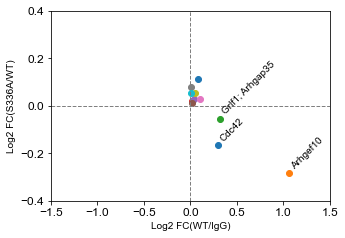

In [11]:
highlights = []

plt.figure(figsize=(5,3.5))

for t in targets: 
    
    x = interactors.loc[interactors['Gene Symbol'] == t, 'Fold change WT/IgG'].values
    y = - mutant.loc[mutant['Gene Symbol'] == t, 'Fold change WT/S336A'].values 
    #Fold change calculation was done in opposite direction

    plt.scatter(x,y)
    
    if y<0 : 
    
        plt.text(x+.01,y+.02,t, rotation=45)
        
        highlights.append({'Gene Symbol': t, 'FC WT/IgG': x[0], 'FC S336A/WT': y[0]})

plt.axhline(y=0, linestyle='dashed', c='gray', linewidth=1)
plt.axvline(x=0, linestyle='dashed', c='gray', linewidth=1)

plt.ylabel('Log2 FC(S336A/WT)')
plt.xlabel('Log2 FC(WT/IgG)')

plt.ylim(-.4, .4)
plt.xlim(-1.5, 1.5)

plt.savefig('./Cdc42_targets.png', dpi=300)

plt.show()    

## Export relevant hits in Excel

In [13]:
h = pd.DataFrame(highlights)

In [14]:
with pd.ExcelWriter('../Proteomics5_NDRG1_coIP.xlsx', engine='openpyxl', mode='a') as writer:
    h.to_excel(writer, sheet_name='NDRG1_interactors')